# Actividad obligatoria con Seaborn 

Despues de haber trabajado con las funciones de Seaborn, se plantea la siguiente actividad.\
Se trata de localizar dos dataset en cualquiera de las fuentes que se ofrecen más abajo:
- Un dataset debe ofrecer de entre todas sus caracteristicas o features predictoras, al menos 2 parejas entre las que exista una relación tal que permita un entrenamiento de regresión lineal.
- Un dataset debe ofrecer de entre todas sus caracteristicas o features predictoras, al menos 2 parejas entre las que exista una relación tal que permita un entrenamiento de clasificación. 

Con ayuda de la biblioteca Seaborn y tomando como referencia esta plantilla, describe y ofrece una visualización de las relaciones entre variables seleccionadas de cada dataset.\
Debes subir el archivo una vez completado el codigo que corresponda junto con los dataset seleccionados completando las siguientes cuestiones:

1º Describe cada uno de los dataset seleccionados (que información contienen).\
2º Nombra y describe las dos parejas de caracteristicas que has selecionado  de cada uno de ellos.\
3º Indica que tipo de correlación existe entre ellas y si pretendes utilizarlas para un algoritmo de regresión o de clasificación.\
4º Presenta gráficamente la relación entre las parejas de caracteristicas (solamente de las parejas elegidas).

Nota: puede ocurir que algun apartado de la plantilla quede en blanco si el tipo de caracteristica que se pretende representar no corresponde.\ (por ejemplo: si no hemos seleccionado ninguna caracteristica cualitativa, el correspondiente apartado se elimina del notebook a entregar)


### Algunos sitios donde encontrar dataset:
https://archive.ics.uci.edu/datasets

https://www.kaggle.com/datasets

https://data.gov/

https://data.unicef.org/resources/resource-type/datasets/



# 1. Houston Housing
#### Este dataset contiene datos sobre viviendas en los suburbios de Boston.

#### Incluye 13 variables predictoras relacionadas con características socioeconómicas y físicas de las áreas (por ejemplo, la proporción de habitaciones por vivienda, la tasa de criminalidad, etc.) y una variable objetivo: MEDV, que representa el precio medio de las viviendas en miles de dólares.

#### Parejas

- **RM (número promedio de habitaciones) y MEDV (valor medio de las casas):** Existe una relación positiva esperada: a mayor número de habitaciones, el valor medio de las casas tiende a aumentar. Ideal para regresión lineal.

- **LSTAT (porcentaje de población con ingresos bajos) y MEDV:** Existe una relación negativa esperada. A mayor porcentaje de población con ingresos bajos, el valor medio de las casas disminuye. Tambien es ideal para regresión lineal.

In [126]:
import numpy as np
import pandas as pd

# Matplotlib es la libreria base para la visualización de datos en Python
import matplotlib.pyplot as plt

# Bajo Seaborn subyace Matplotlib. Será usada por Seaborn 
import seaborn as sns

In [127]:
# Establecer el estilo "darkgrid" 
sns.set_style("darkgrid")

In [128]:
# Seleccionamos mostrar los graficos en formato SVG (Gráficos Vectoriales Escalables), son mas nitidos y legibles que otros formatos
%config InlineBackend.figure_format = 'svg'

In [129]:
# df = pd.read_csv('./data/Boston/HousingData.csv')
boston_df = pd.read_csv('./data/Boston/HousingData.csv')

In [130]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [131]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [132]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

### Estadística de las Columnas:



In [133]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Tabla de frecuencias


In [134]:
#df['..............'].value_counts()
boston_df['CHAS'].value_counts()

CHAS
0.0    452
1.0     34
Name: count, dtype: int64

## Representación gráfica de las parejas RM y MEDV

Text(0.5, 1.0, 'Relación entre RM y MEDV (sin regresión lineal)')

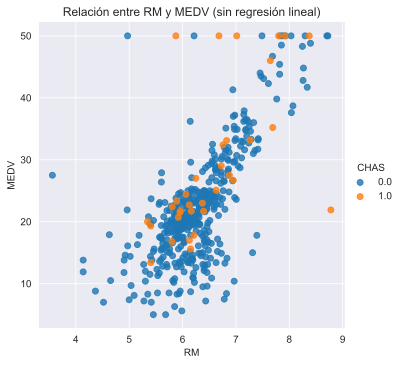

In [135]:
# sns.lmplot(x='.....',y= '..............', data=df, hue='......', fit_reg=False) # Si lo ponemos a true muestra linea de regresión
sns.lmplot(x='RM',y= 'MEDV', data=boston_df, hue='CHAS', fit_reg=False)
plt.title('Relación entre RM y MEDV (sin regresión lineal)')

Text(0.5, 1.0, 'Relación entre RM y MEDV (con regresión lineal)')

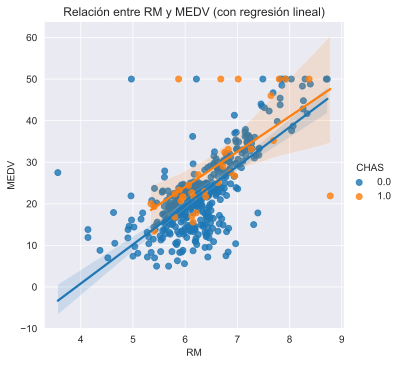

In [136]:
sns.lmplot(x='RM',y= 'MEDV', data=boston_df, hue='CHAS', fit_reg=True)
plt.title('Relación entre RM y MEDV (con regresión lineal)')

## Representación gráfica de las parejas LSTAT y MEDV

Text(0.5, 1.0, 'Relación entre LSTAT y MEDV (sin regresión lineal)')

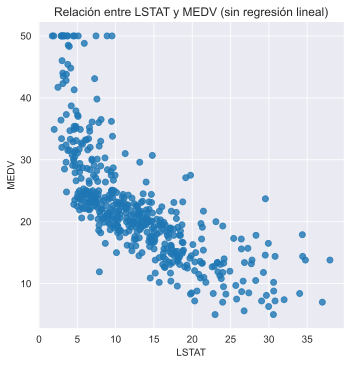

In [137]:
# Pareja 2: LSTAT y MEDV sin línea de regresión
sns.lmplot(x='LSTAT', y='MEDV', data=boston_df, fit_reg=False)
plt.title('Relación entre LSTAT y MEDV (sin regresión lineal)')


Text(0.5, 1.0, 'Relación entre LSTAT y MEDV (con regresión lineal)')

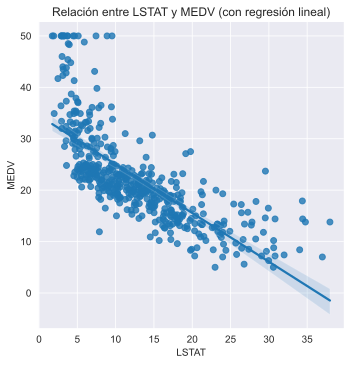

In [138]:
# Pareja 2: LSTAT y MEDV con línea de regresión
sns.lmplot(x='LSTAT', y='MEDV', data=boston_df, fit_reg=True)
plt.title('Relación entre LSTAT y MEDV (con regresión lineal)')


# 2. Iris
#### Es un dataset de clasificación. 


#### Contiene 4 características continuas: sepal_length, sepal_width, petal_length, y petal_width. La variable objetivo, species, tiene tres categorías: setosa, versicolor y virginica.

#### Parejas

- **sepal_length y sepal_width:** Estas características suelen diferenciar bien entre las especies setosa, versicolor y virginica.. Ideal para clasificación.

- **petal_length y petal_width:** Esta pareja tiene una relación más fuerte y también permite clasificar correctamente entre especies. Tambien es ideal para clasificación.

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set_style("darkgrid")

In [ ]:
%config InlineBackend.figure_format = 'svg'

## Cargamos el dataset Iris

In [167]:
iris_df = pd.read_csv('./data/iris/iris.data')

## Asignamos los nombres a las columnas del dataset Iris

In [ ]:
iris_df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Verificar los nombres de las columnas
print(iris_df.head())


   sepal_length  sepal_width  petal_length  petal_width      species
0           4.9          3.0           1.4          0.2  Iris-setosa
1           4.7          3.2           1.3          0.2  Iris-setosa
2           4.6          3.1           1.5          0.2  Iris-setosa
3           5.0          3.6           1.4          0.2  Iris-setosa
4           5.4          3.9           1.7          0.4  Iris-setosa


In [169]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [170]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   species       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [171]:
iris_df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

### Estadística de las Columnas:


In [172]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Tabla de frecuencias

In [178]:
iris_df['species'].value_counts()

species
Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: count, dtype: int64

## Representación gráfica de las parejas sepal_length y sepal_width

Text(0.5, 1.0, 'Relación entre sepal_length y sepal_width')

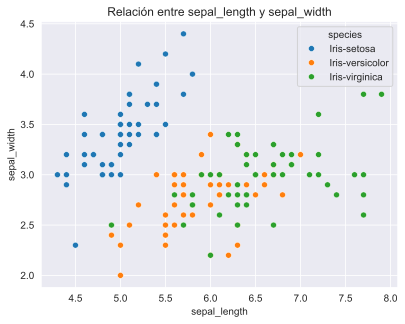

In [179]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=iris_df)
plt.title('Relación entre sepal_length y sepal_width')

## Representación gráfica de las parejas petal_length y petal_width

Text(0.5, 1.0, 'Relación entre petal_length y petal_width')

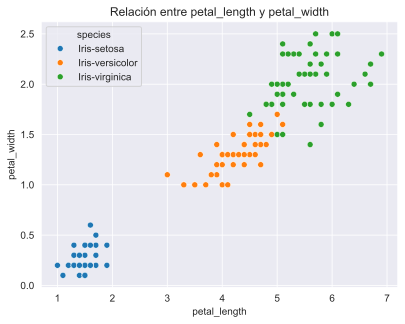

In [180]:
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=iris_df)
plt.title('Relación entre petal_length y petal_width')
